# Principal Component Analysis 

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

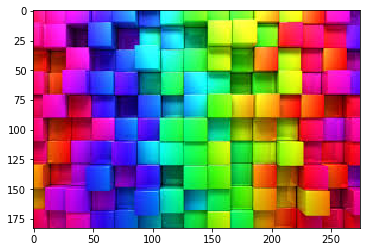

In [102]:
img = cv.imread('color.jpeg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [97]:
X = np.reshape(img , (img.shape[2], img.shape[0]*img.shape[1]))
X = np.array([X[i] - np.mean(X[i]) for i in range(3)])
N = len(X[0])
Cx = np.matmul(X, X.T)/N
print(X.shape, N, Cx.shape)

(3, 50325) 50325 (3, 3)


In [105]:
_, Ex = np.linalg.eig(Cx)
Y = np.matmul(Ex.T, X)
print(Y.shape)

(3, 50325)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


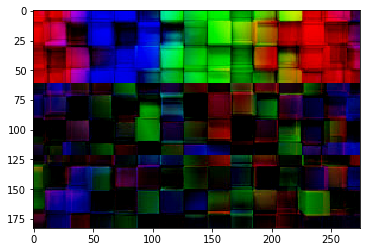

In [104]:
out_img = np.reshape(Y, img.shape).astype(np.int)
plt.imshow(out_img)
plt.show()

##### Failure Case

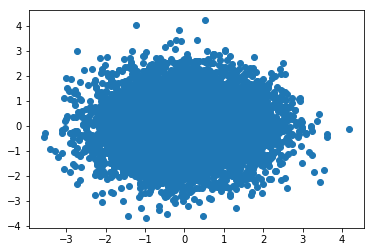

(2, 10000)


In [47]:
mean = np.zeros(2)
cov = np.array([[1,0],[0,1]]) # positive definite
X = np.random.multivariate_normal(mean, cov, int(1e4)).T
plt.plot(X[0], X[1],'o')
plt.show()
print(X.shape)

(2, 2)
(2, 10000) (2, 2)


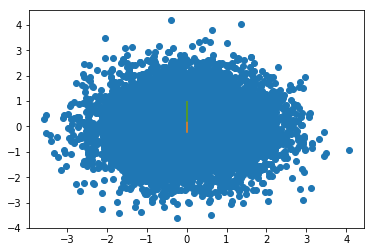

In [48]:
N = len(X[0])
Cx = np.matmul(X, X.T)/N
print(Cx.shape)
_, Ex = np.linalg.eig(Cx)
Y = np.matmul(Ex.T, X)
print(Y.shape, Ex.shape)
plt.plot(Y[0], Y[1],'o')
plt.plot([0,0], Ex[0])
plt.plot([0,0], Ex[1])
plt.show()

PCA tries to reduce the dimensionality by finding the orthogonal pricipal components. 
The figure clearly shows that the eigen vectors are not orthogonal. 